# Libraries

In [1]:
# LIBRARIES
import os
import git

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load Data

In [2]:
# LOAD DATA
# Function to load dataset from githun
def get_git_root(path) -> str:
    git_repo = git.Repo(path, search_parent_directories=True)
    git_root = git_repo.git.rev_parse("--show-toplevel")
    return git_root


git_dir = get_git_root(os.getcwd())  # Github folder where dataset is storaged.
data_dir = os.path.join(git_dir, "data")  # Data folder

# Import dataset to a DataFrame
df_train = pd.read_csv(
    os.path.join(data_dir, "train.csv")
) 

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# FILL MISSING VALUES AND CHECK AGAIN

columns_with_missing_values = df_train.columns[
    df_train.notnull().sum() < len(df_train)
].tolist()
print("#### LIST OF COLUMNS WITH MISSING VALUES ####")
print(columns_with_missing_values)

#### LIST OF COLUMNS WITH MISSING VALUES ####
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [5]:
print(
    f"\nTotal quantity of columns with missing values: {len(columns_with_missing_values)}"
)


Total quantity of columns with missing values: 19


In [6]:
df_train_missing_values = df_train[columns_with_missing_values].copy()

df_train_missing_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    588 non-null    object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

In [7]:
# Split "columns_with_missing_values" in 3 different groups, each one with different methods of filling missing values
fill_with_none = columns_with_missing_values  # Create a new list with all columns that will be filled with none, but before fill the other 2 groups must be removed from this list

fill_with_not_answered = [
    "MasVnrType",
    "Electrical",
]  # Remove columns that will be filled as "not answered" instead of "none"
for column in fill_with_not_answered:
    if column in fill_with_not_answered:
        fill_with_none.remove(column)

fill_with_zero = [
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
]  # Remove columns that will be filled with ZERO instead of "none"
for column in fill_with_zero:
    if column in fill_with_none:
        fill_with_none.remove(column)
# END OF Split "columns_with_missing_values" in 3 different groups, each one with different methods of filling missing values


# Print these lists to check
print("### Columns to be filled with none:")
print(fill_with_none)
print("\n### Columns to be filled with zeros:")
print(fill_with_not_answered)
print("\n### Columns to be filled with zeros:")
print(fill_with_zero)
print("\n### Total columns to be filled:")
total_columns = len(fill_with_none) + len(fill_with_not_answered) + len(fill_with_zero)
print(total_columns)
# END OF Print these lists to check

### Columns to be filled with none:
['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

### Columns to be filled with zeros:
['MasVnrType', 'Electrical']

### Columns to be filled with zeros:
['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

### Total columns to be filled:
19


In [8]:
# Fill missing values and create a new dataframe to do not affect the original one
df_train_filled = df_train.copy()  # Cria uma cópia do dataframe original

df_train_filled[fill_with_none] = df_train_filled[fill_with_none].fillna("none")
df_train_filled[fill_with_not_answered] = df_train_filled[
    fill_with_not_answered
].fillna("not answered")
df_train_filled[fill_with_zero] = df_train_filled[fill_with_zero].fillna(0)
# END OF Fill missing values and create a new dataframe to do not affect the original one

# Check if the new dataframe still has any missing data.
columns_with_missing_values_2 = df_train_filled.columns[
    df_train_filled.notnull().sum() < len(df_train_filled)
].tolist()
print("#### LIST OF COLUMNS WITH MISSING VALUES ON NEW DATAFRAME####")
print(columns_with_missing_values_2)
print(
    f"\nTotal quantity of columns with missing values: {len(columns_with_missing_values_2)}"
)
# END OF Check if the new dataframe still has any missing data.

#### LIST OF COLUMNS WITH MISSING VALUES ON NEW DATAFRAME####
[]

Total quantity of columns with missing values: 0


In [9]:
# Separar as colunas numéricas e categóricas
numeric_columns = df_train_filled.select_dtypes(include="number").columns
categorical_columns = df_train_filled.select_dtypes(include="object").columns

# Converter as colunas categóricas em numéricas
df_train_filled_encoded = df_train_filled.copy()
for column in categorical_columns:
    le = LabelEncoder()
    df_train_filled_encoded[column] = le.fit_transform(df_train_filled_encoded[column])

# Definir as features e o target
X = df_train_filled_encoded.drop("SalePrice", axis=1)
y = df_train_filled_encoded["SalePrice"]

# Treinar um modelo de regressão
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Obter a importância das features
importances = model.feature_importances_

# Criar um dataframe com as importâncias das features
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Exibir as colunas com maior importância para SalePrice
top_features = feature_importances.head(12)  # Exemplo: top 12 colunas
print(top_features)

         Feature  Importance
17   OverallQual    0.578920
46     GrLivArea    0.111006
38   TotalBsmtSF    0.037223
44      2ndFlrSF    0.031308
34    BsmtFinSF1    0.029247
61    GarageCars    0.024415
43      1stFlrSF    0.023921
4        LotArea    0.012733
62    GarageArea    0.012642
19     YearBuilt    0.008352
49      FullBath    0.008038
12  Neighborhood    0.006930


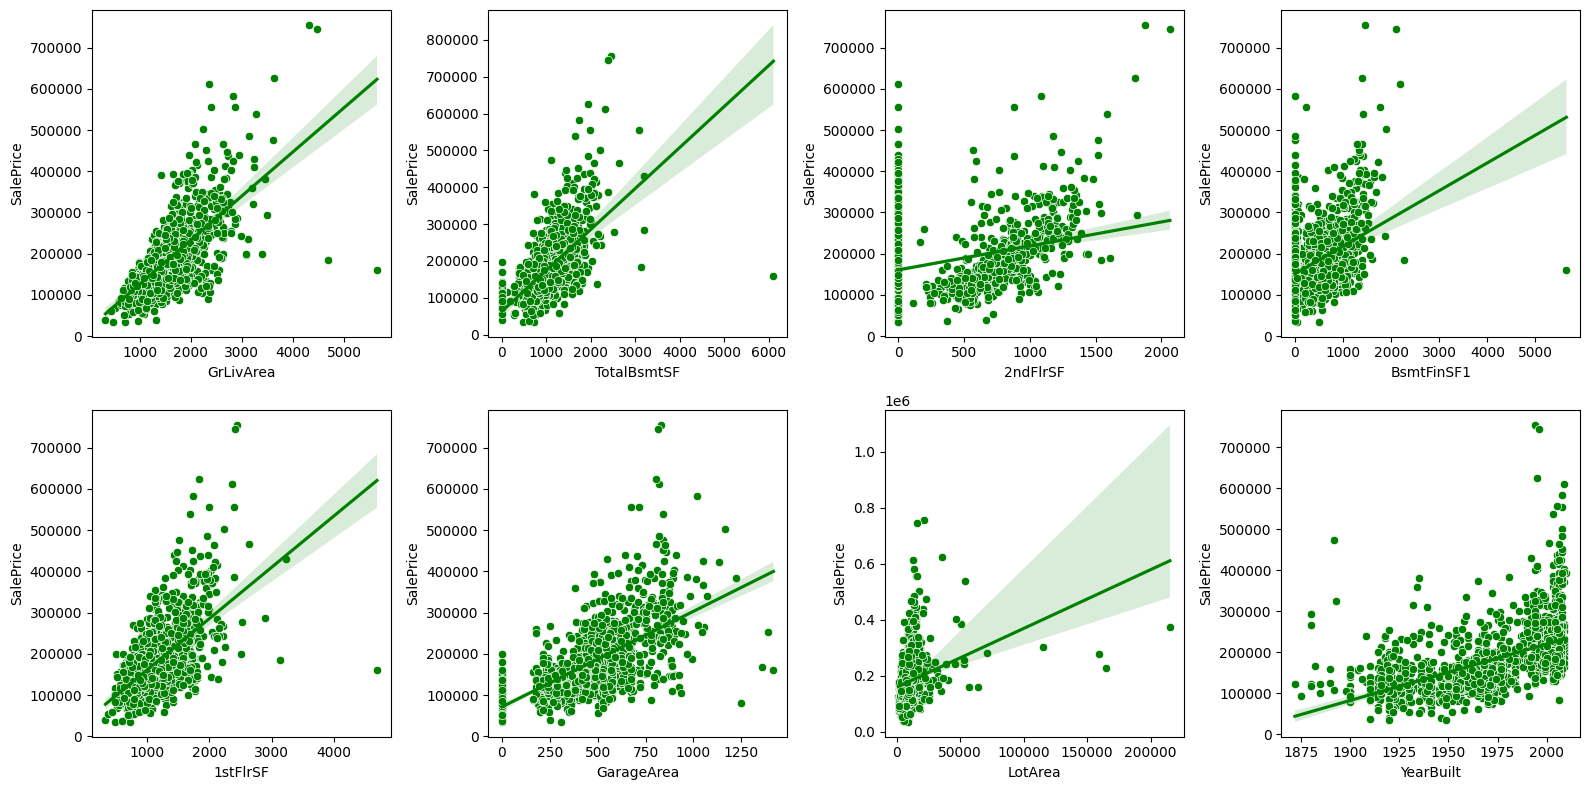

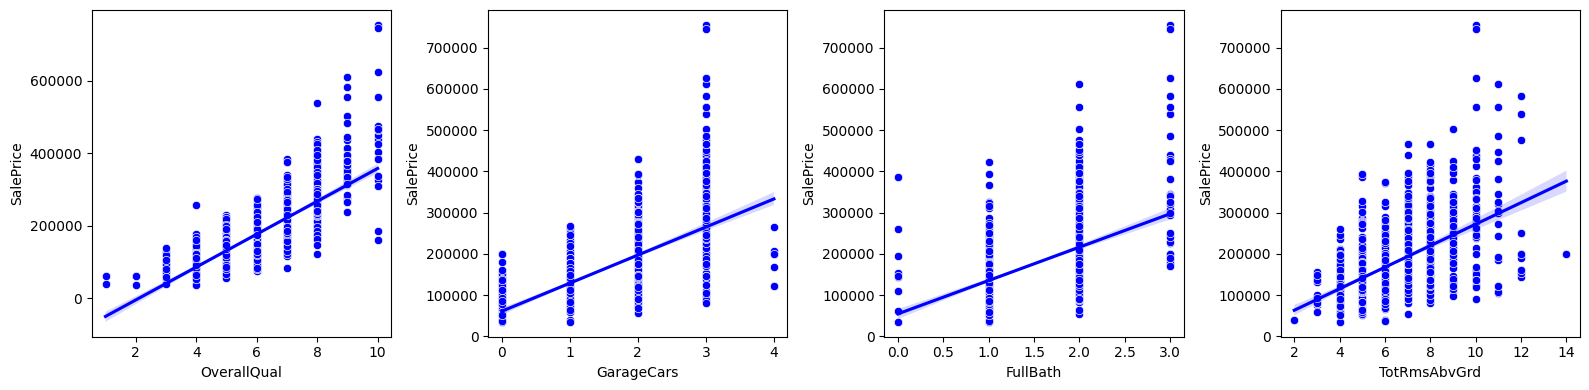

In [10]:
# Definir as colunas para a primeira matriz
columns1 = [
    "GrLivArea",
    "TotalBsmtSF",
    "2ndFlrSF",
    "BsmtFinSF1",
    "1stFlrSF",
    "GarageArea",
    "LotArea",
    "YearBuilt",
]
# Definir as colunas para a segunda matriz
columns2 = ["OverallQual", "GarageCars", "FullBath", "TotRmsAbvGrd"]

# Criar a primeira matriz de gráficos
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

# Percorrer as colunas da primeira matriz
for i, column in enumerate(columns1):
    row = i // 4
    col = i % 4
    ax = axs[row, col]
    sns.scatterplot(
        x=column, y="SalePrice", data=df_train_filled_encoded, ax=ax, color="green"
    )
    sns.regplot(
        x=column,
        y="SalePrice",
        data=df_train_filled_encoded,
        ax=ax,
        scatter=False,
        color="green",
    )
    ax.set_xlabel(column)
    ax.set_ylabel("SalePrice")

# Ajustar o espaçamento entre os subplots da primeira matriz
plt.tight_layout()

# Criar a segunda matriz de gráficos
fig, axs = plt.subplots(1, 4, figsize=(16, 4))

# Percorrer as colunas da segunda matriz
for i, column in enumerate(columns2):
    ax = axs[i]
    sns.scatterplot(
        x=column, y="SalePrice", data=df_train_filled_encoded, ax=ax, color="blue"
    )
    sns.regplot(
        x=column,
        y="SalePrice",
        data=df_train_filled_encoded,
        ax=ax,
        scatter=False,
        color="blue",
    )
    ax.set_xlabel(column)
    ax.set_ylabel("SalePrice")

# Ajustar o espaçamento entre os subplots da segunda matriz
plt.tight_layout()

# Exibir as matrizes de gráficos
plt.show()

In [11]:
# Selecionar as colunas para as variáveis independentes
X1 = df_train[columns1]
X2 = df_train_filled_encoded[columns2]

# Combinar as colunas 1 e 2 em uma única variável X
X = pd.concat([X1, X2], axis=1)

# Variável dependente
y = df_train["SalePrice"]

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Criar um modelo de regressão linear
model = LinearRegression()

# Treinar o modelo
model.fit(X_train, y_train)

# Realizar as previsões
y_pred = model.predict(X_test)

# Calcular o erro quadrático médio para as previsões
mse = mean_squared_error(y_test, y_pred)
print(f"Erro Quadrático Médio: {mse}")


# Valores de SalePrice do dataframe 
sale_price_values = df_train['SalePrice'].values 
# Cálculo da média e desvio padrão de SalePrice 
sale_price_mean = np.mean(sale_price_values) 
# Definir limiar para determinar se o MSE é bom ou ruim 
sale_price_std = np.std(sale_price_values) 
limiar = sale_price_std # Pode ser ajustado conforme necessário

# Definir limiar para determinar se o MSE é bom ou ruim limiar = sale_price_std # Pode ser ajustado conforme necessário
limiar = sale_price_std
# Comparar o MSE com o limiar
if mse < limiar:
    print("O MSE é considerado bom em relação à variabilidade de SalePrice.")
else:
    print("O MSE é considerado ruim em relação à variabilidade de SalePrice.")

Erro Quadrático Médio: 1502773457.32917
O MSE é considerado ruim em relação à variabilidade de SalePrice.


In [12]:
import numpy as np

# Identificar os valores máximo e mínimo de columns1 e columns2
min_columns1 = df_train_filled_encoded[columns1].min()
max_columns1 = df_train_filled_encoded[columns1].max()

min_columns2 = df_train_filled_encoded[columns2].min()
max_columns2 = df_train_filled_encoded[columns2].max()

# Gerar novos valores aleatórios para columns1 e columns2
random_columns1 = np.random.uniform(
    low=min_columns1, high=max_columns1, size=len(columns1)
)
random_columns2 = np.random.uniform(
    low=min_columns2, high=max_columns2, size=len(columns2)
)

# Criar uma lista X_new com os nomes dos itens e os respectivos valores aleatórios
X_new = list(zip(columns1, random_columns1)) + list(zip(columns2, random_columns2))

# Mostrar os valores aleatórios gerados e os itens correspondentes
print("Valores aleatórios gerados:")
for item, value in X_new:
    print(f"{item}: {value}")

# Realizar a predição de SalePrice com os novos valores de X
X_new_encoded = pd.DataFrame(X_new, columns=["Item", "Value"])
X_new_encoded["Item"] = X_new_encoded["Item"].map(
    df_train_filled_encoded.columns.get_loc
)
X_new_encoded = X_new_encoded.set_index("Item").T
y_pred_new = model.predict(X_new_encoded)

# Imprimir as previsões
print("Previsões:")
print(y_pred_new)

Valores aleatórios gerados:
GrLivArea: 2478.1248889493427
TotalBsmtSF: 1690.9734262195846
2ndFlrSF: 1146.9068124574312
BsmtFinSF1: 4577.010096971139
1stFlrSF: 509.8732978172957
GarageArea: 1049.295485869169
LotArea: 163033.7098304325
YearBuilt: 1891.6404530761545
OverallQual: 4.316326829483825
GarageCars: 0.8498932696305928
FullBath: 0.38506315106984734
TotRmsAbvGrd: 7.079575210663294
Previsões:
[296769.20300301]


c:\Users\vinic\repositories\house-prices-prediction-ppgia\.env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [13]:
X_new

[('GrLivArea', 2478.1248889493427),
 ('TotalBsmtSF', 1690.9734262195846),
 ('2ndFlrSF', 1146.9068124574312),
 ('BsmtFinSF1', 4577.010096971139),
 ('1stFlrSF', 509.8732978172957),
 ('GarageArea', 1049.295485869169),
 ('LotArea', 163033.7098304325),
 ('YearBuilt', 1891.6404530761545),
 ('OverallQual', 4.316326829483825),
 ('GarageCars', 0.8498932696305928),
 ('FullBath', 0.38506315106984734),
 ('TotRmsAbvGrd', 7.079575210663294)]

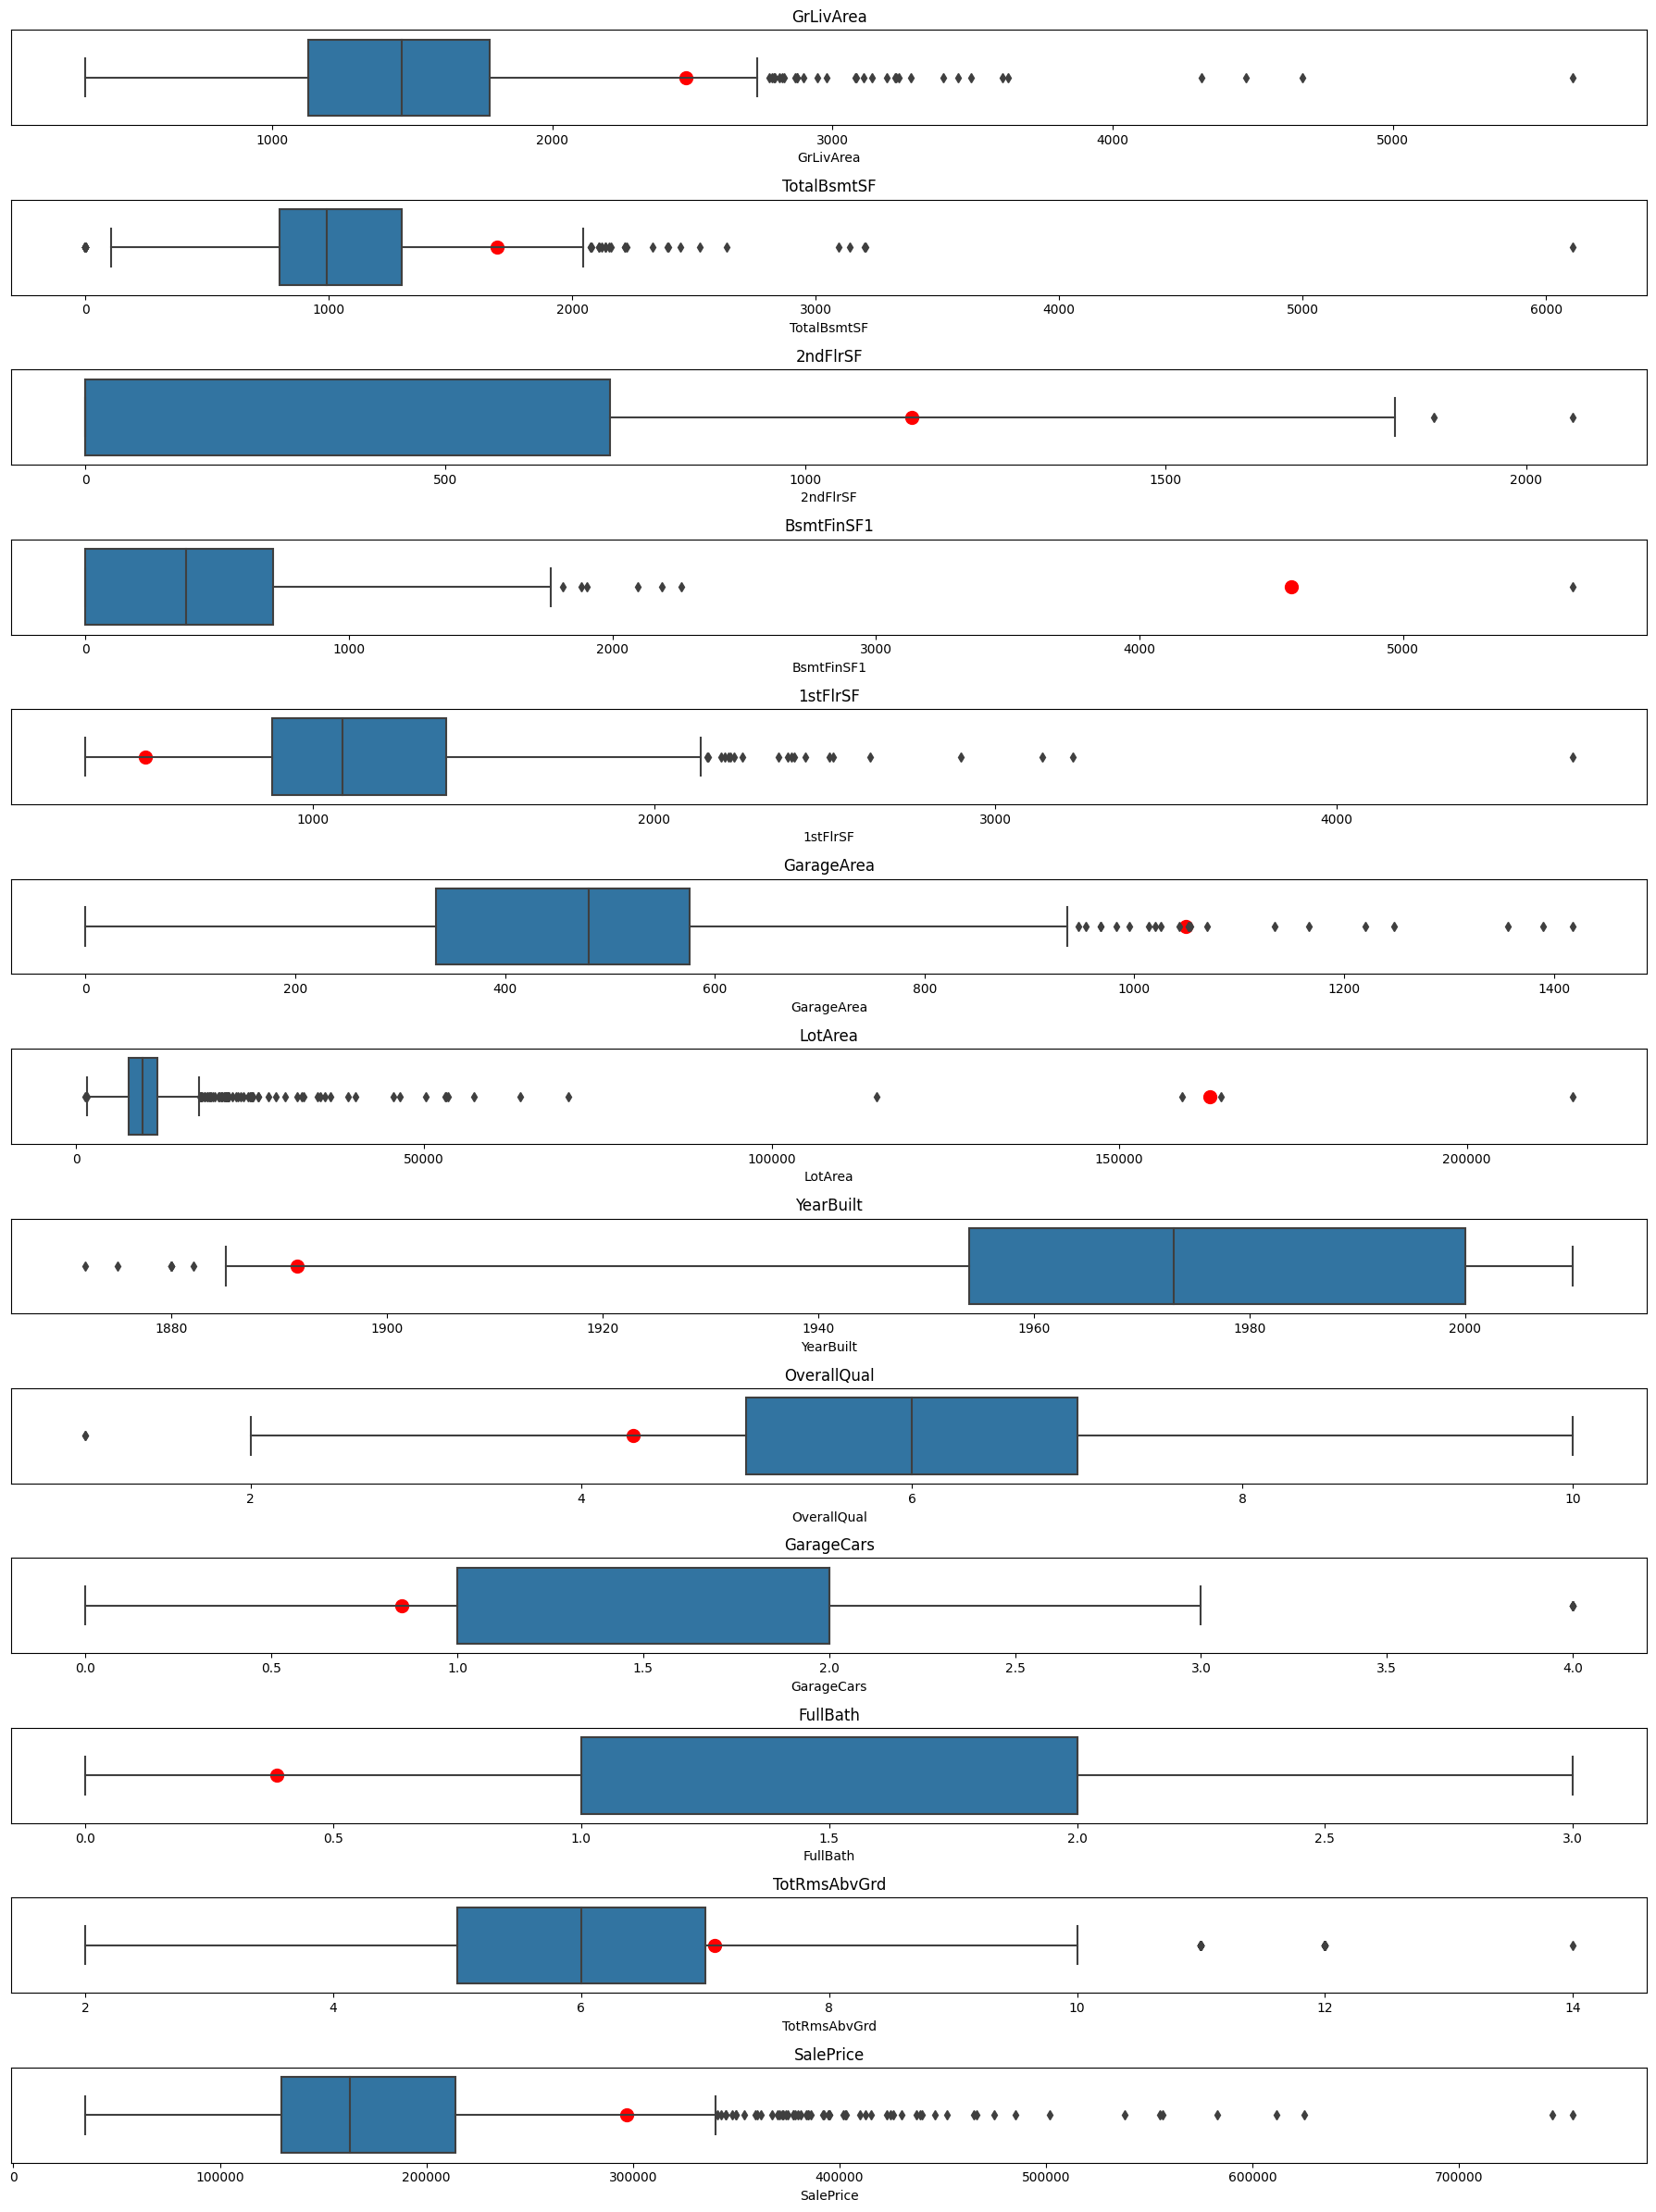

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações de plotagem
plt.figure(figsize=(18, 24))

# Criar um subplot para cada item em X_new
for i, (item, value) in enumerate(X_new):
    plt.subplot(len(X_new) + 1, 1, i + 1)
    sns.boxplot(x=df_train_filled_encoded[item], orient="h")
    plt.scatter(value, 0, color="red", s=100)
    plt.yticks([])
    plt.title(item)

# Adicionar o boxplot dos valores de SalePrice
plt.subplot(len(X_new) + 1, 1, len(X_new) + 1)
sns.boxplot(x=df_train_filled_encoded["SalePrice"], orient="h")
plt.scatter(y_pred_new, 0, color="red", s=100)
plt.yticks([])
plt.title("SalePrice")

# Ajustar espaçamentos
plt.tight_layout()

# Exibir os gráficos
plt.show()